Install Site-Packages to Read XLS File

In [1]:
!pip install xlrd pandas matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

# Load and prepare data
df = pd.read_excel('Concrete_Data.xls', sheet_name='Sheet1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Raname Column Names for Better Access

In [4]:
# Rename features name
df.columns = ['cement', 'blast_furnance_slag', 'fly_ash', 'water', 'super_plasticizer', 'coarse_agg', 'fine_agg', 
              'age', 'compressive_strength']
df.columns

Index(['cement', 'blast_furnance_slag', 'fly_ash', 'water',
       'super_plasticizer', 'coarse_agg', 'fine_agg', 'age',
       'compressive_strength'],
      dtype='object')

Check for missing values

In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 cement                  0
blast_furnance_slag     0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


Describe the Dataset

In [6]:
df.head()

,cement,blast_furnance_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.describe()

,cement,blast_furnance_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Feature Distributions

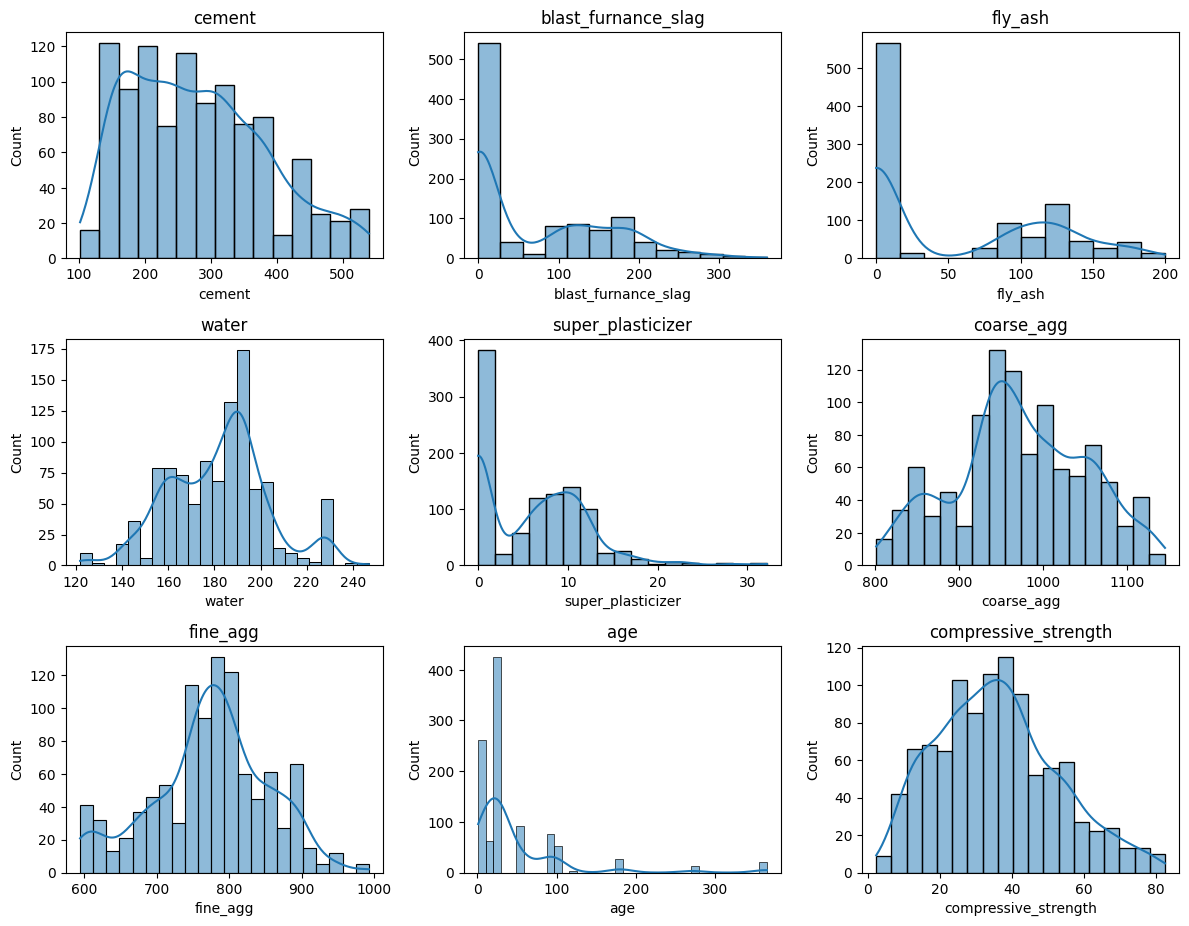

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot feature distributions (4x3 grid for 11 features)
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
plt.tight_layout()
#plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

Correlations

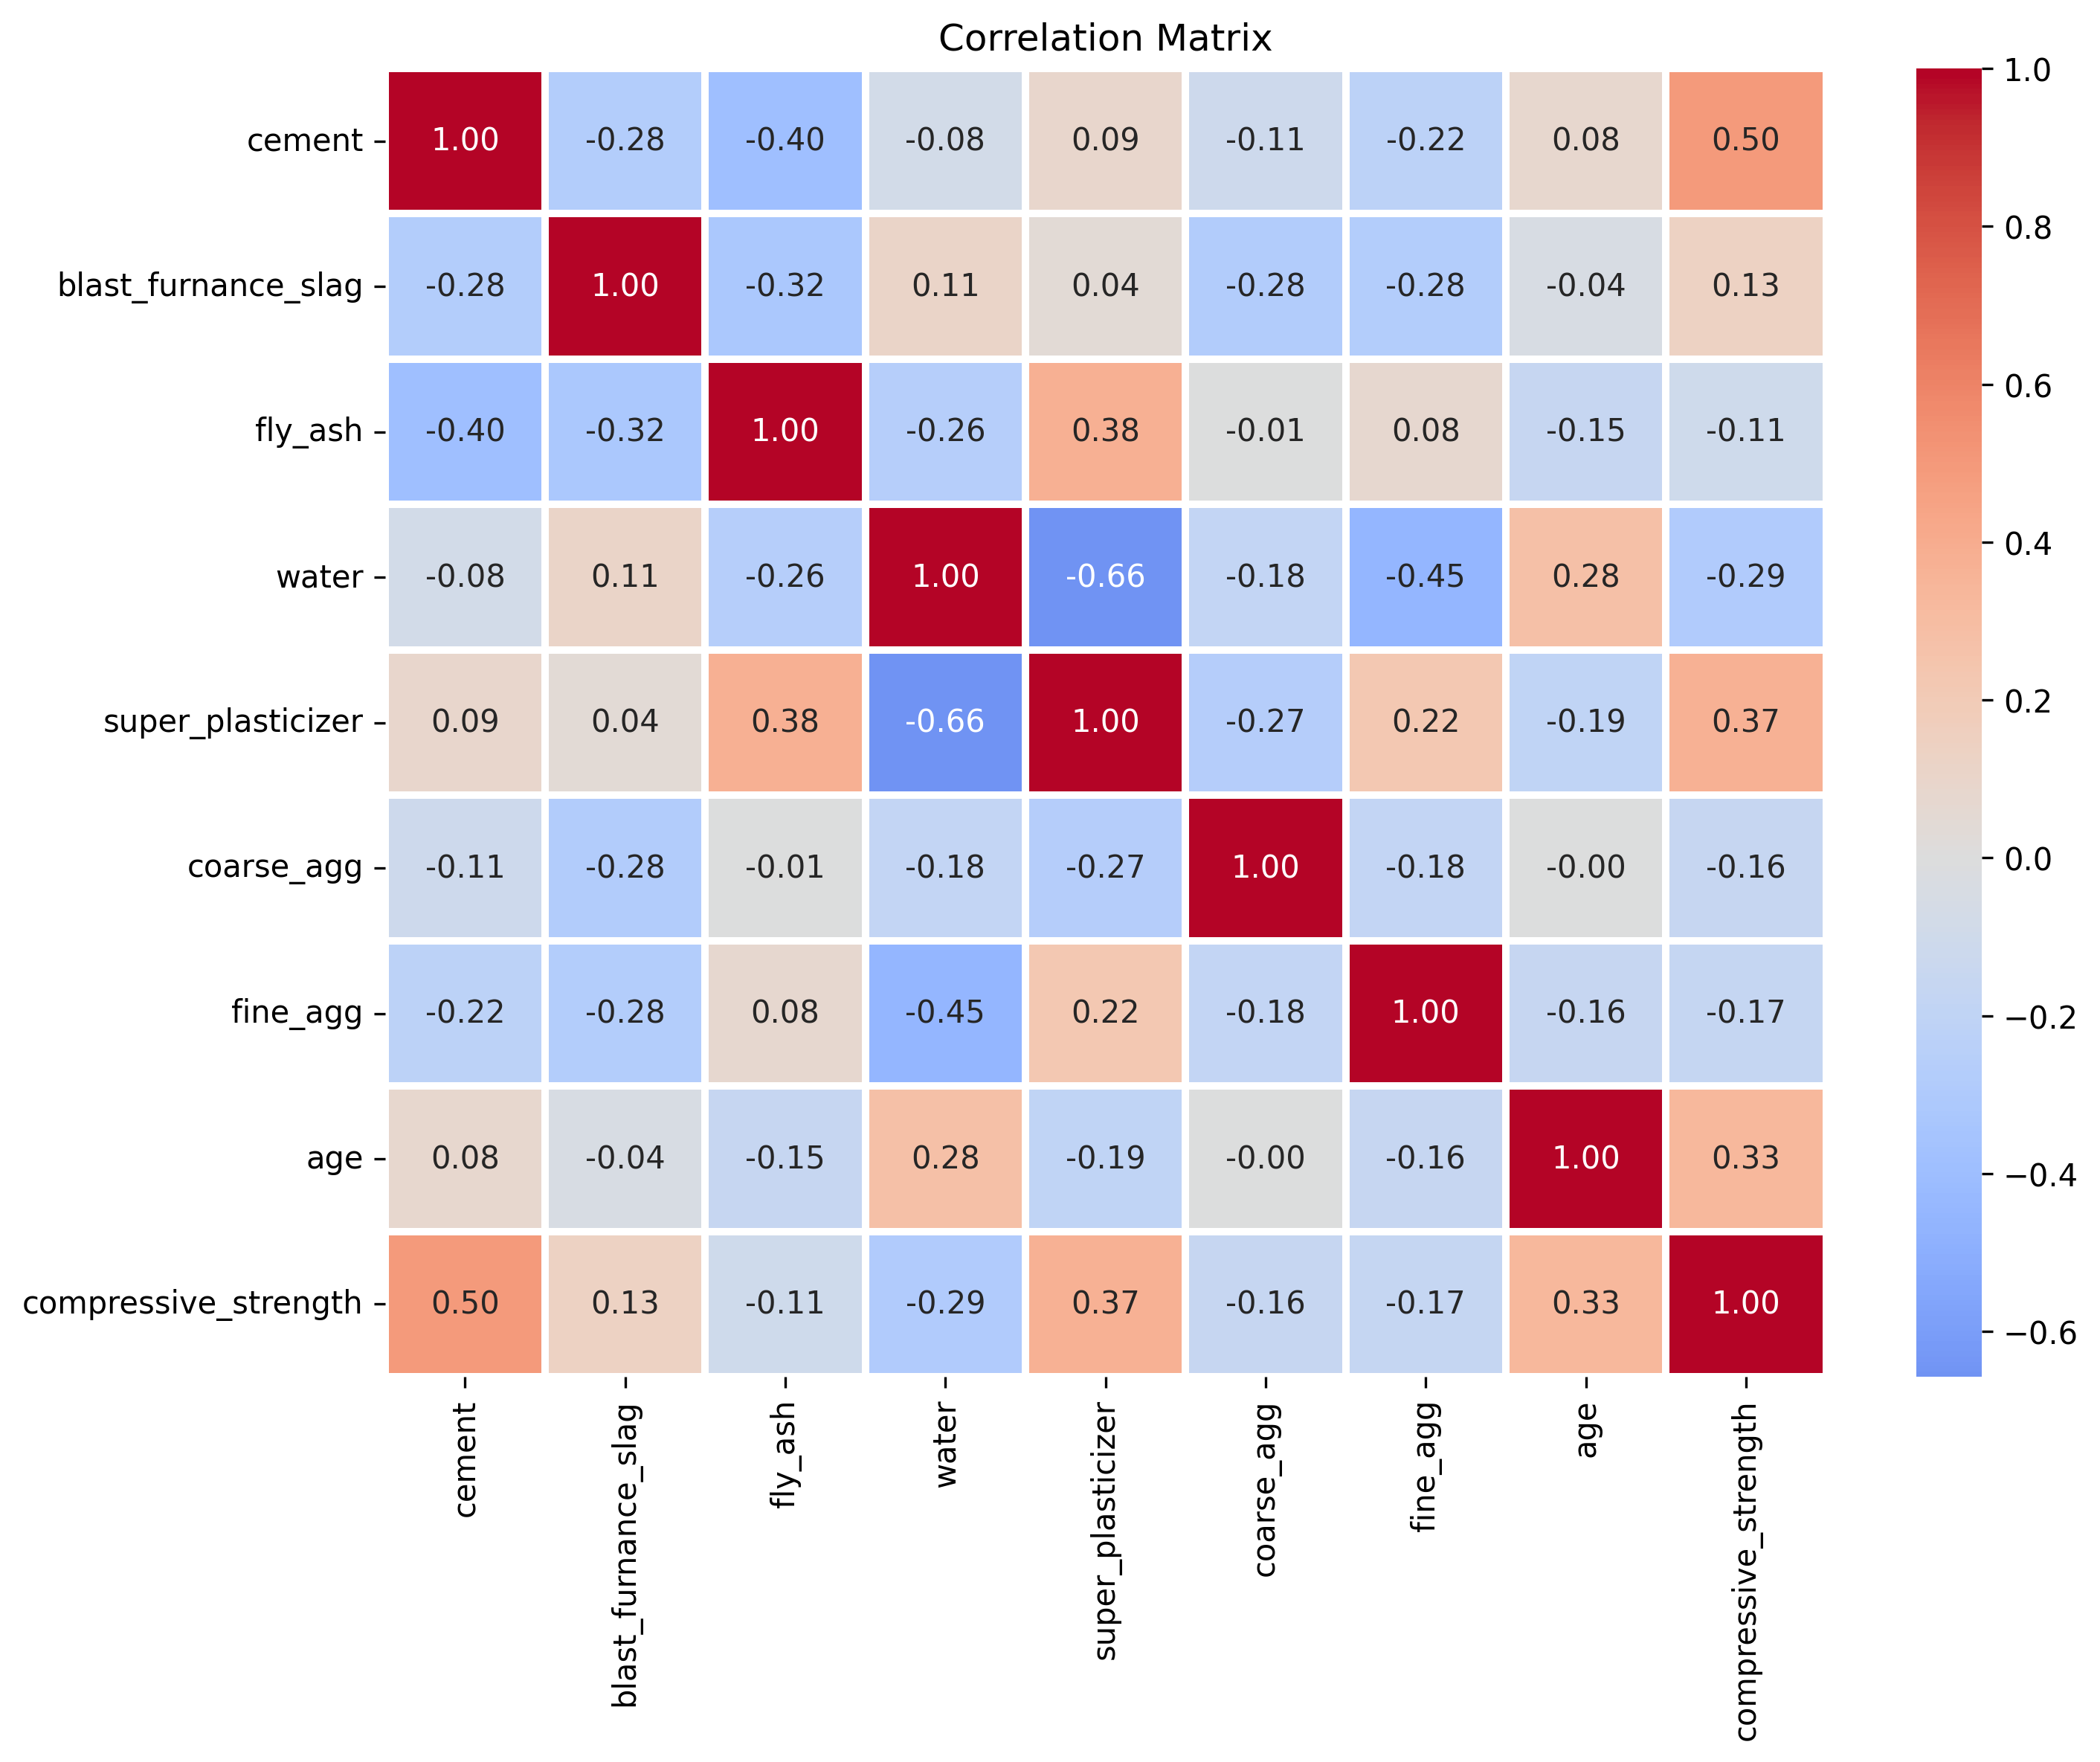

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f',linewidth = 2, linecolor = 'white')
plt.title('Correlation Matrix')
plt.tight_layout()
#plt.savefig('feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Correlations with target
print("Correlations with Concrete Strength:\n\n",
      df.corr()['compressive_strength'].sort_values(ascending=False))

Correlations with Concrete Strength:

 compressive_strength    1.000000
cement                  0.497833
super_plasticizer       0.366102
age                     0.328877
blast_furnance_slag     0.134824
fly_ash                -0.105753
coarse_agg             -0.164928
fine_agg               -0.167249
water                  -0.289613
Name: compressive_strength, dtype: float64


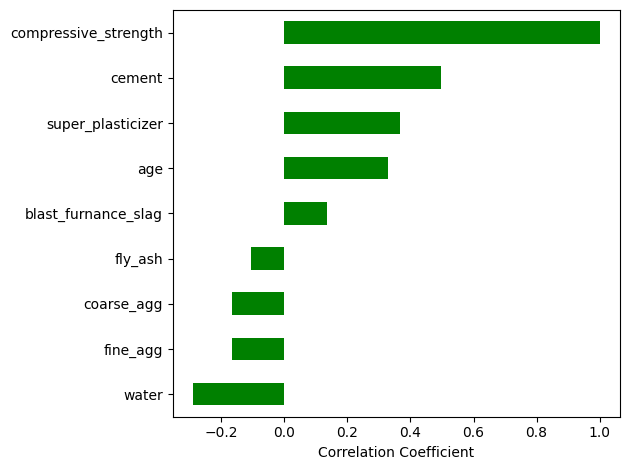

In [11]:
# Correlation coefficient with target
correlation = df.corr()['compressive_strength'].sort_values()
correlation.plot(kind='barh', color='green')
#plt.title('Correlation with Actual Concrete Strength (MPa)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
#plt.savefig('correlation_coefficient.png', dpi=300, bbox_inches='tight')

Distribution Plots

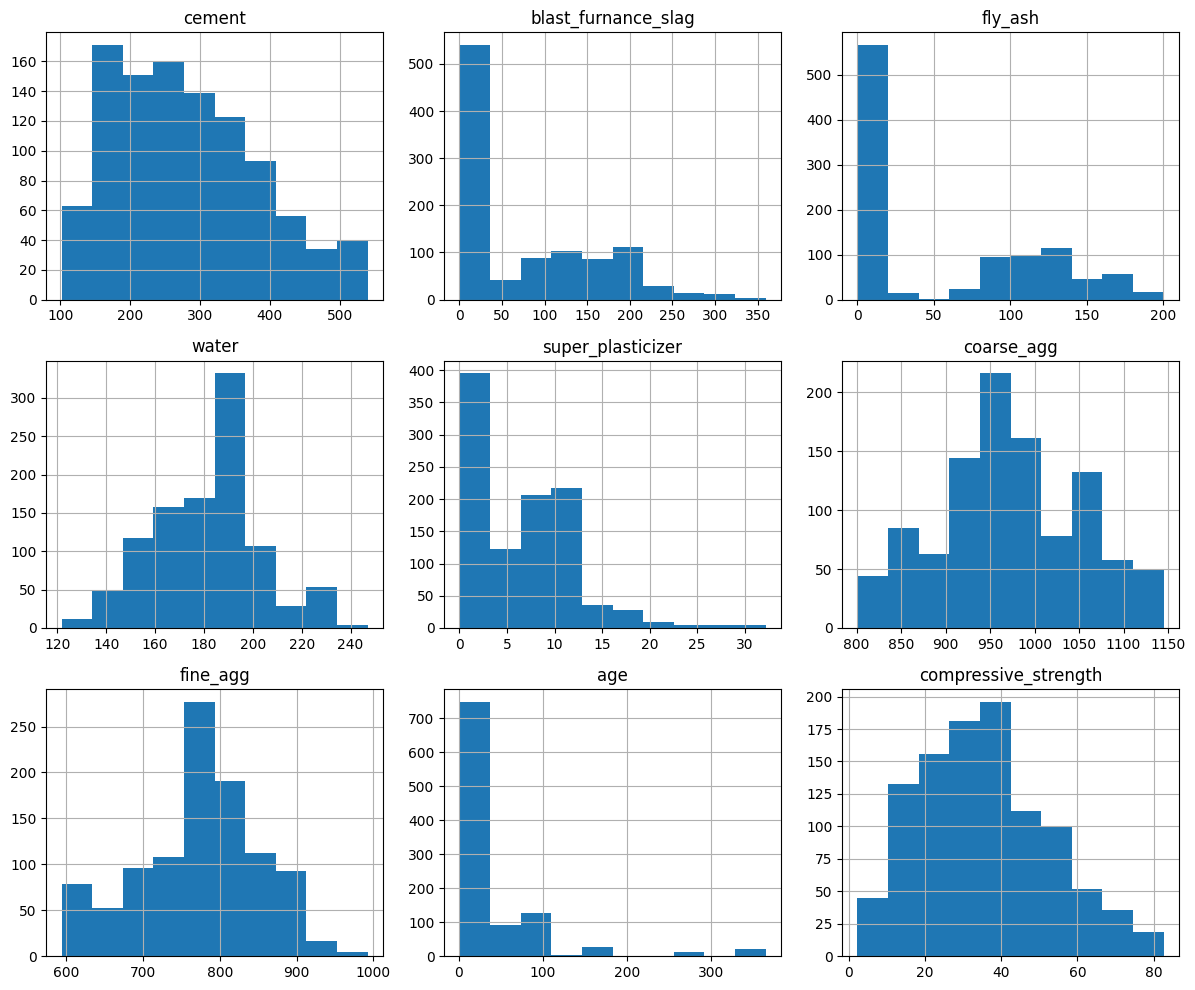

In [12]:
# Feature distributions type 2
df.hist(figsize=(12, 10))
plt.tight_layout()
#plt.savefig('feature_distributions_histplot.png', dpi=300, bbox_inches='tight')
plt.show()

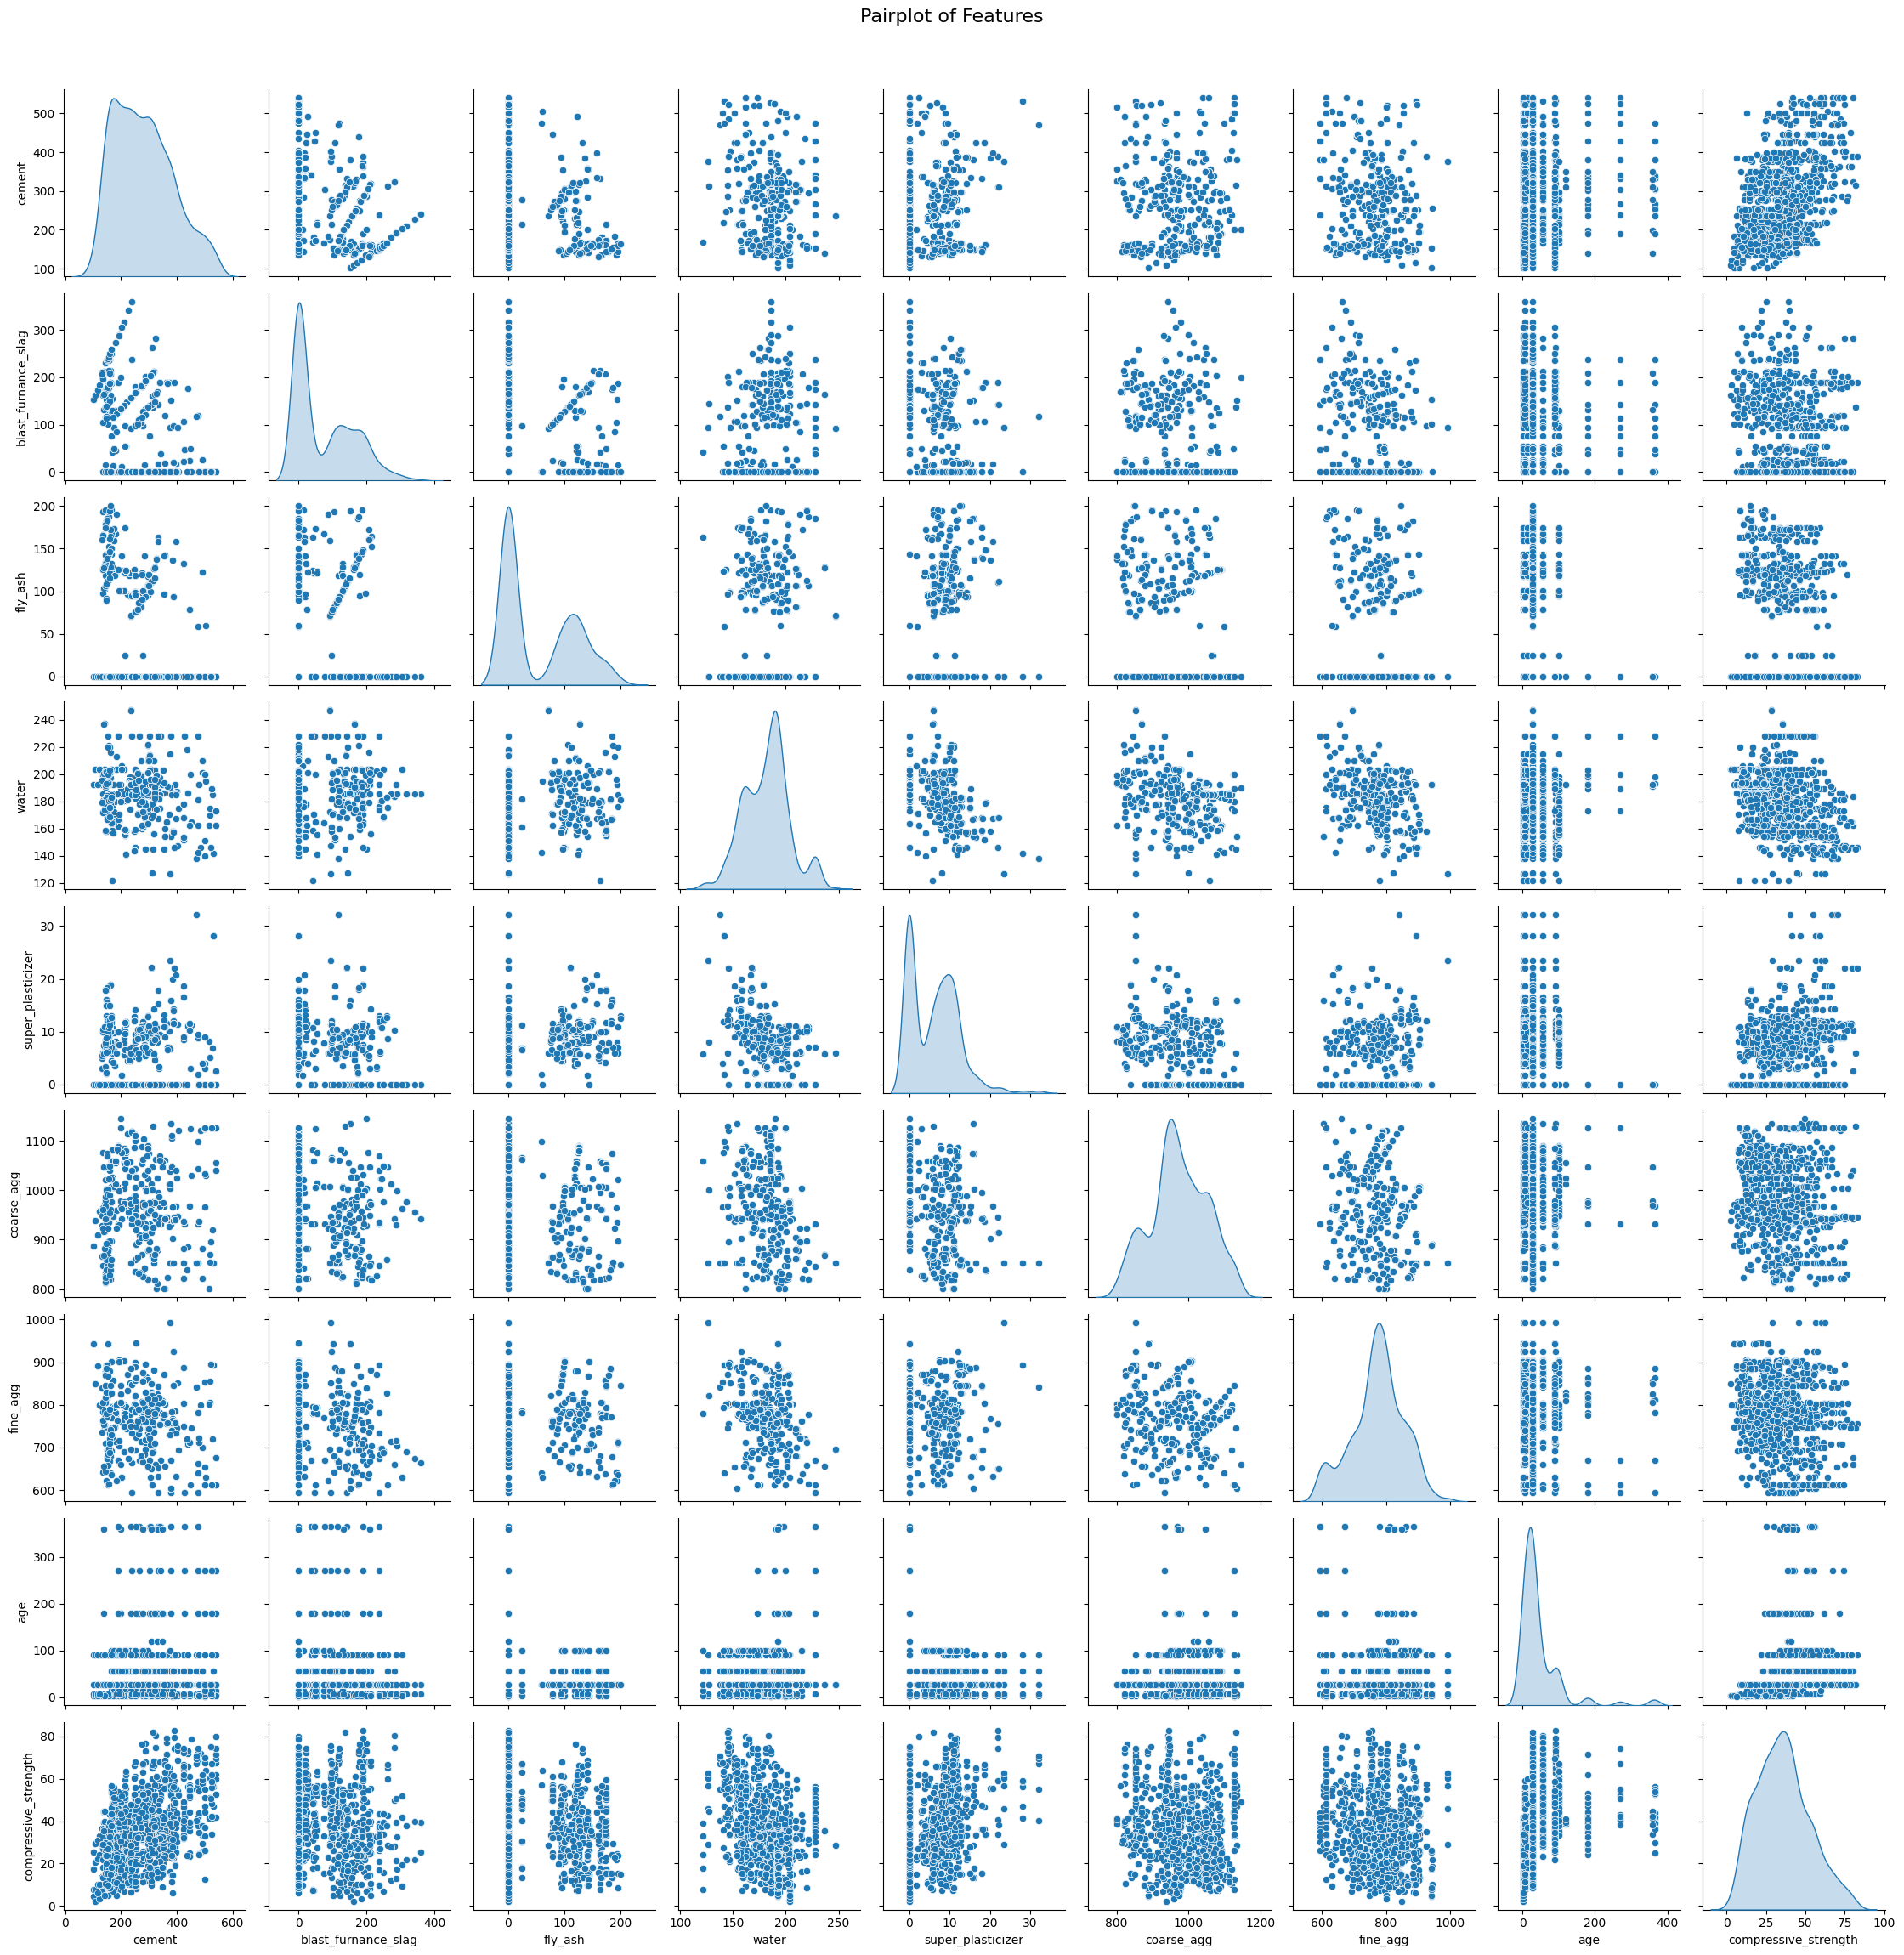

In [13]:
# Pair Plots of features
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", fontsize=16, y=1.02)
plt.tight_layout()
#plt.savefig('feature_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

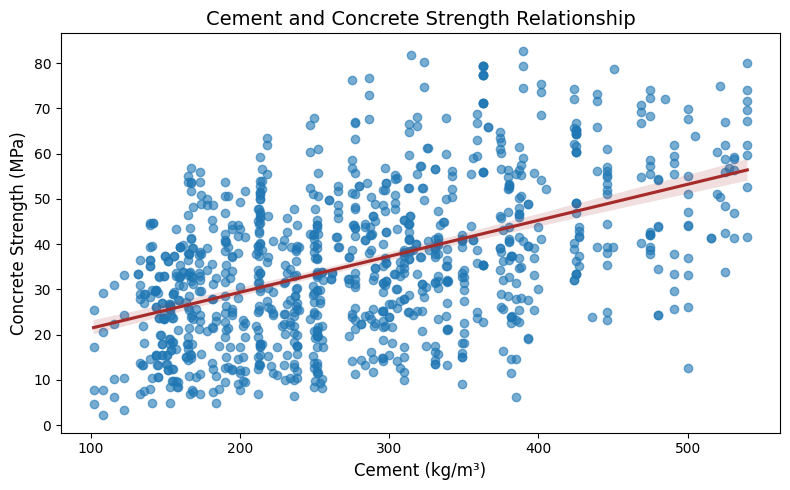

In [14]:
# Relation plots
plt.figure(figsize=(8, 5))
sns.regplot(
    x=df['cement'], 
    y=df['compressive_strength'],
    scatter_kws={'alpha': 0.6},  # transparency of scatter points
    line_kws={'color': 'brown'},  # color of the trendline
)

plt.xlabel('Cement (kg/m³)', fontsize=12)
plt.ylabel('Concrete Strength (MPa)', fontsize=12)
plt.title('Cement and Concrete Strength Relationship', fontsize=14)
plt.tight_layout()
#plt.savefig('concrete_cement_relationship.png', dpi=300, bbox_inches='tight')
plt.show()

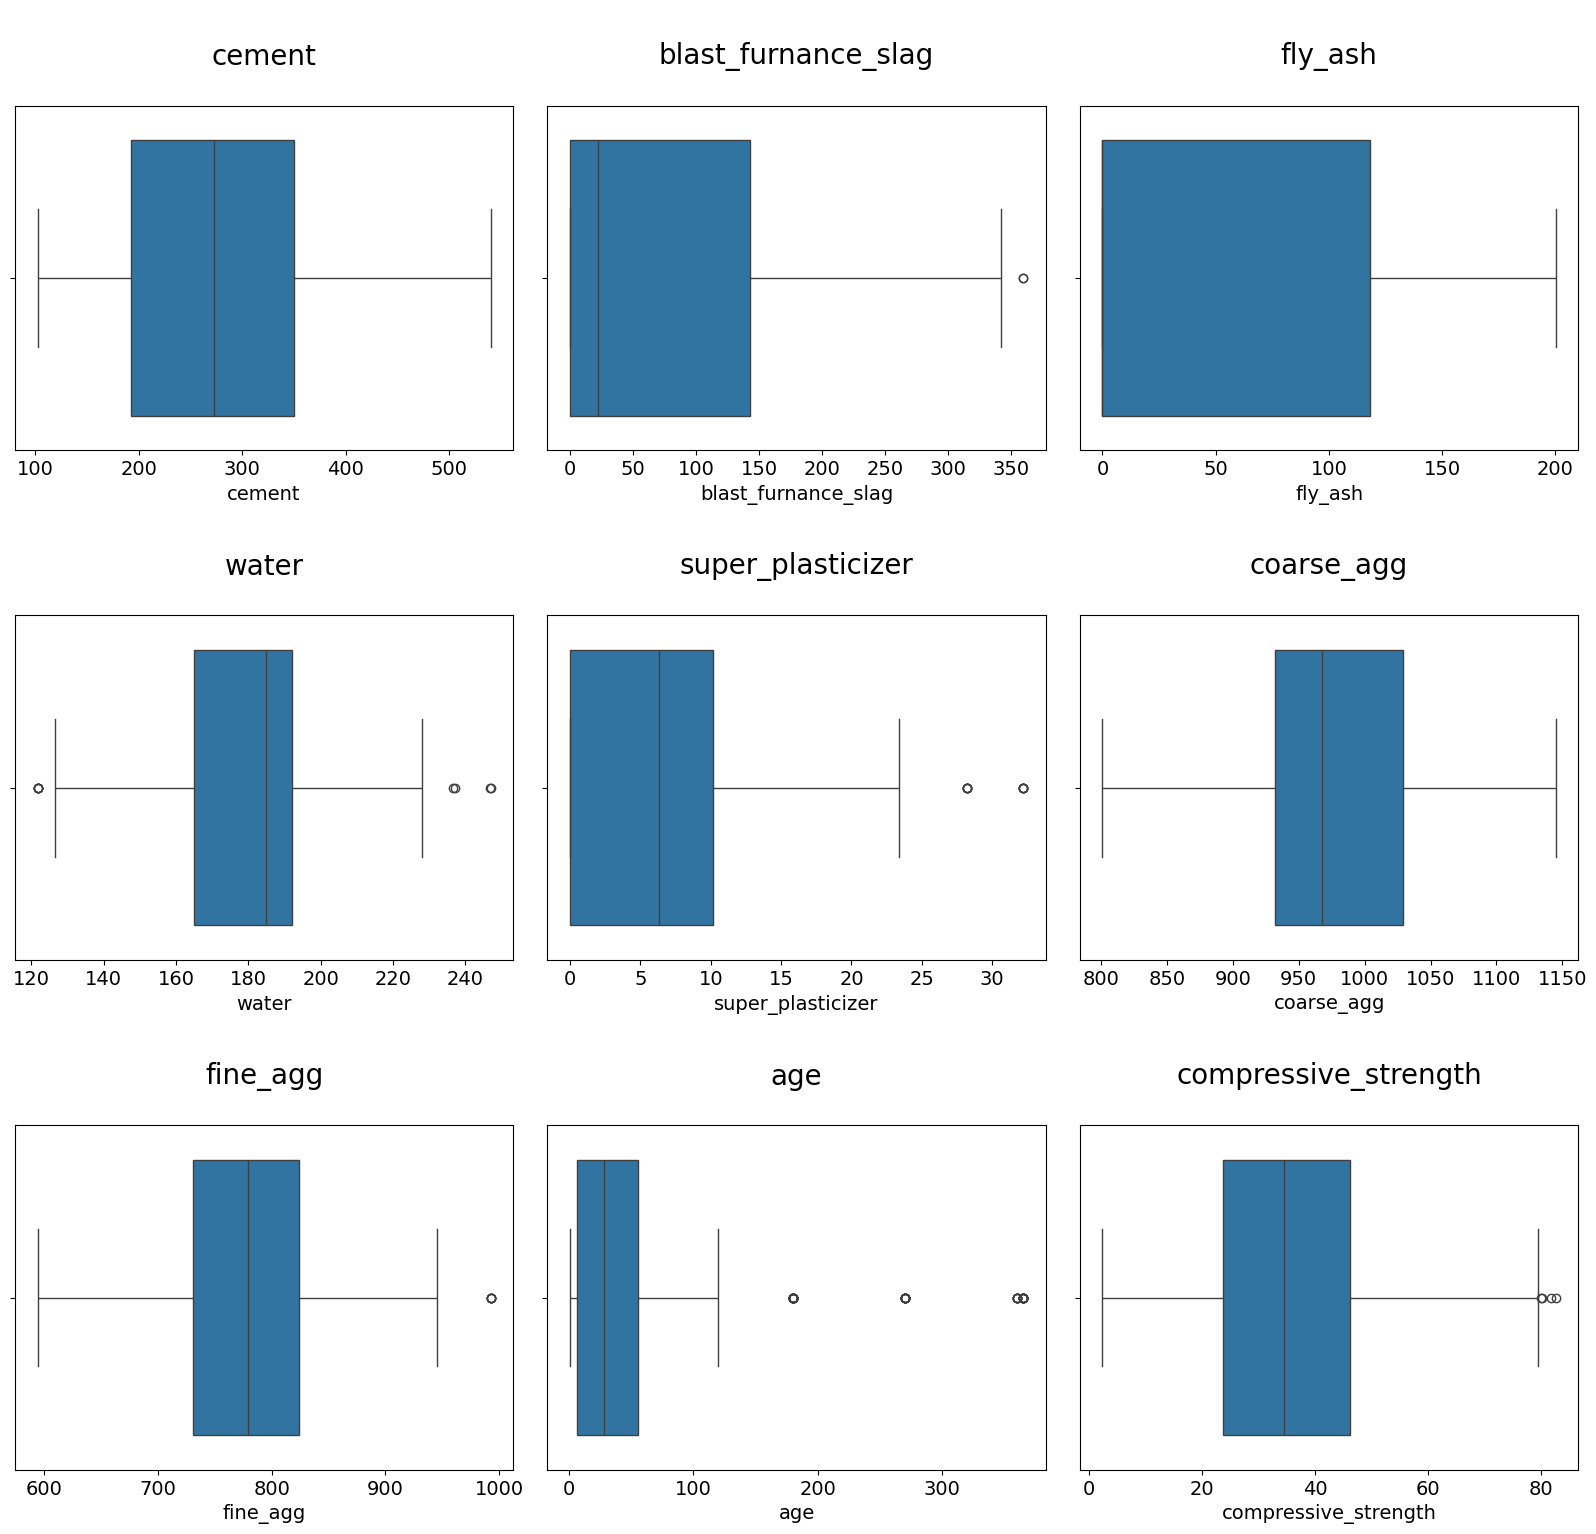

In [15]:
# Outliers Boxplot
# List all columns
features = df.columns

# Set up the figure
plt.figure(figsize=(16, 20))

# Loop through each column and plot
for i, col in enumerate(features, 1):
    ax = plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"\n{col}\n", fontsize=20)
    ax.set_xlabel(col, fontsize=14)               # X-axis label
    ax.tick_params(axis='x', labelsize=14)        # X-axis tick font size

plt.tight_layout()
# plt.savefig('all_feature_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()